## Start

In [ ]:
!nvidia-smi

Mon Oct 16 03:18:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Load Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XngEegQzchABoc7ioD08")
project = rf.workspace("ai-h357g").project("weapondetection-ipjj1")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
  Using cached roboflow-1.1.7-py3-none-any.whl (58 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached supervision-0.15.0-py3-none-any.whl (69 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.

loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [ ]:
!pip uninstall albumentations

Found existing installation: albumentations 1.3.1
Uninstalling albumentations-1.3.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/albumentations-1.3.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/albumentations/*
Proceed (Y/n)? y
  Successfully uninstalled albumentations-1.3.1


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 patience=100 imgsz=640 plots=True batch=32 label_smoothing=0.05 pretrained=True close_mosaic=100

/content
100% 21.5M/21.5M [00:01<00:00, 16.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/WeaponDetection-3/data.yaml, epochs=100, patience=100, batch=32, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=100, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

In [ ]:
%cp -r {HOME}/runs/detect/train '/content/drive/MyDrive/Colab Notebooks/AI집중교육/yolo/v8'

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.csv		   val_batch1_labels.jpg
confusion_matrix.png				    results.png		   val_batch1_pred.jpg
events.out.tfevents.1697257189.c659c394a8ec.7026.0  train_batch0.jpg	   val_batch2_labels.jpg
F1_curve.png					    train_batch1.jpg	   val_batch2_pred.jpg
P_curve.png					    train_batch2.jpg	   weights
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg


/content


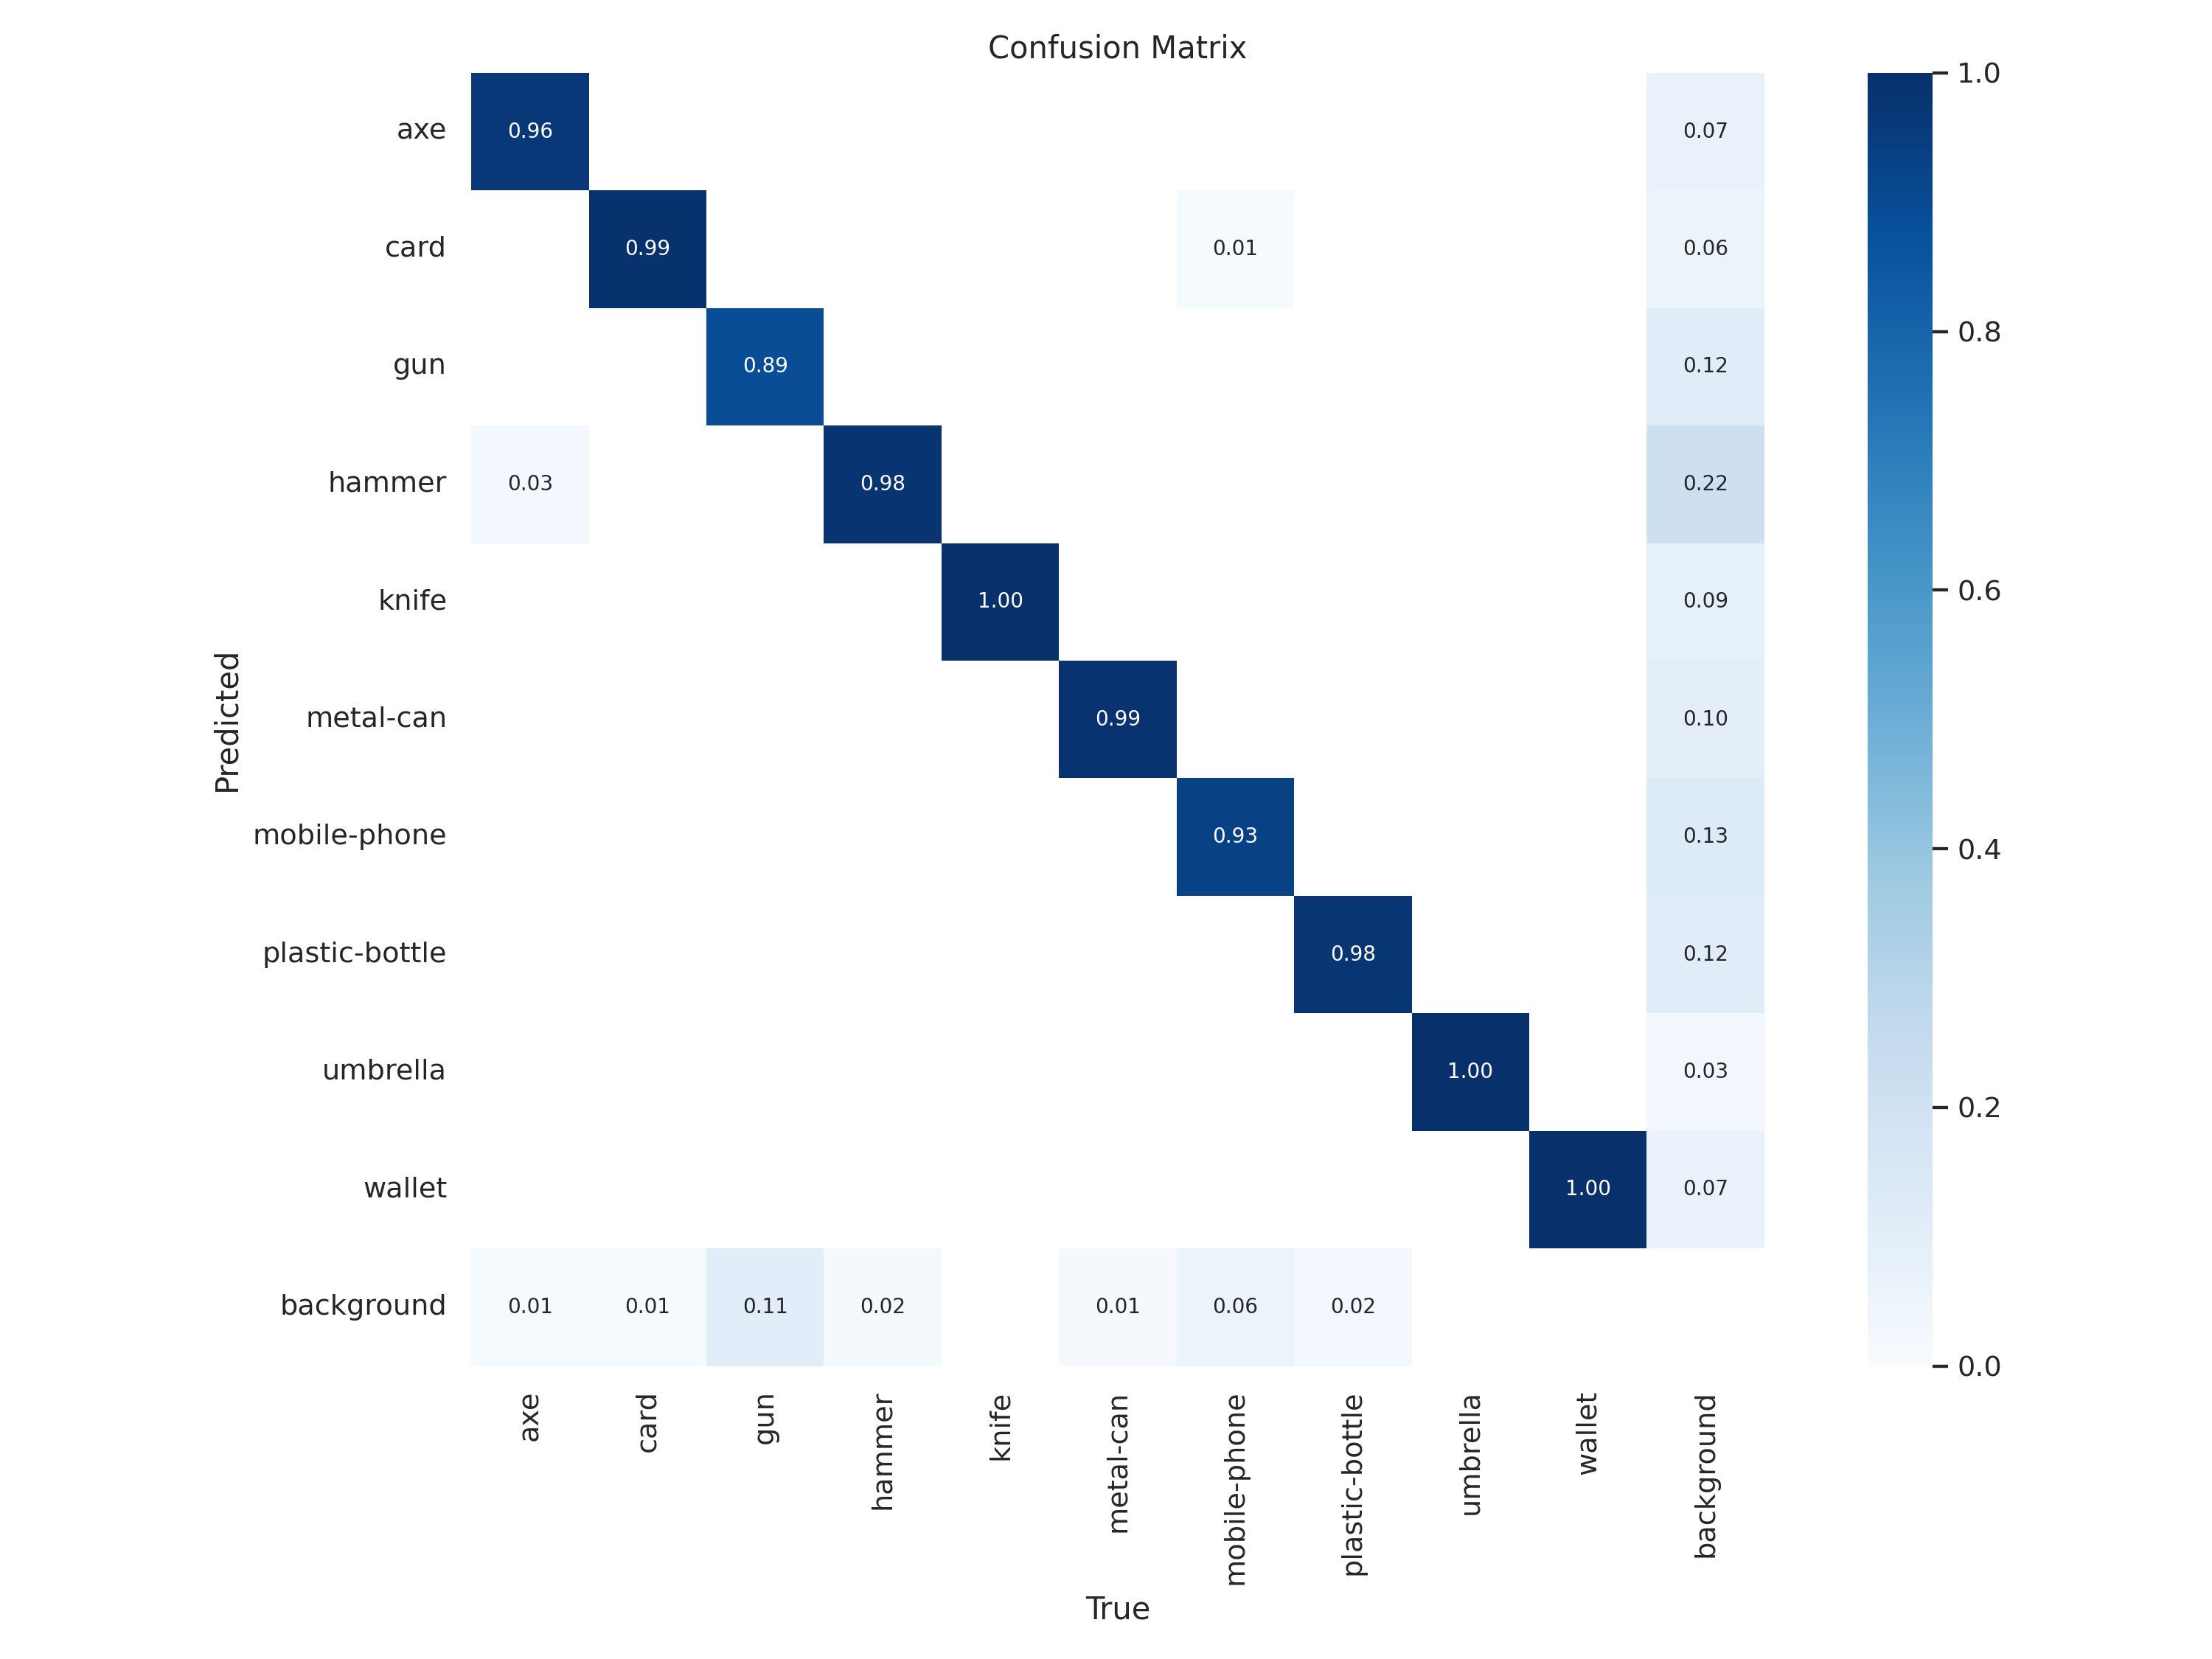

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


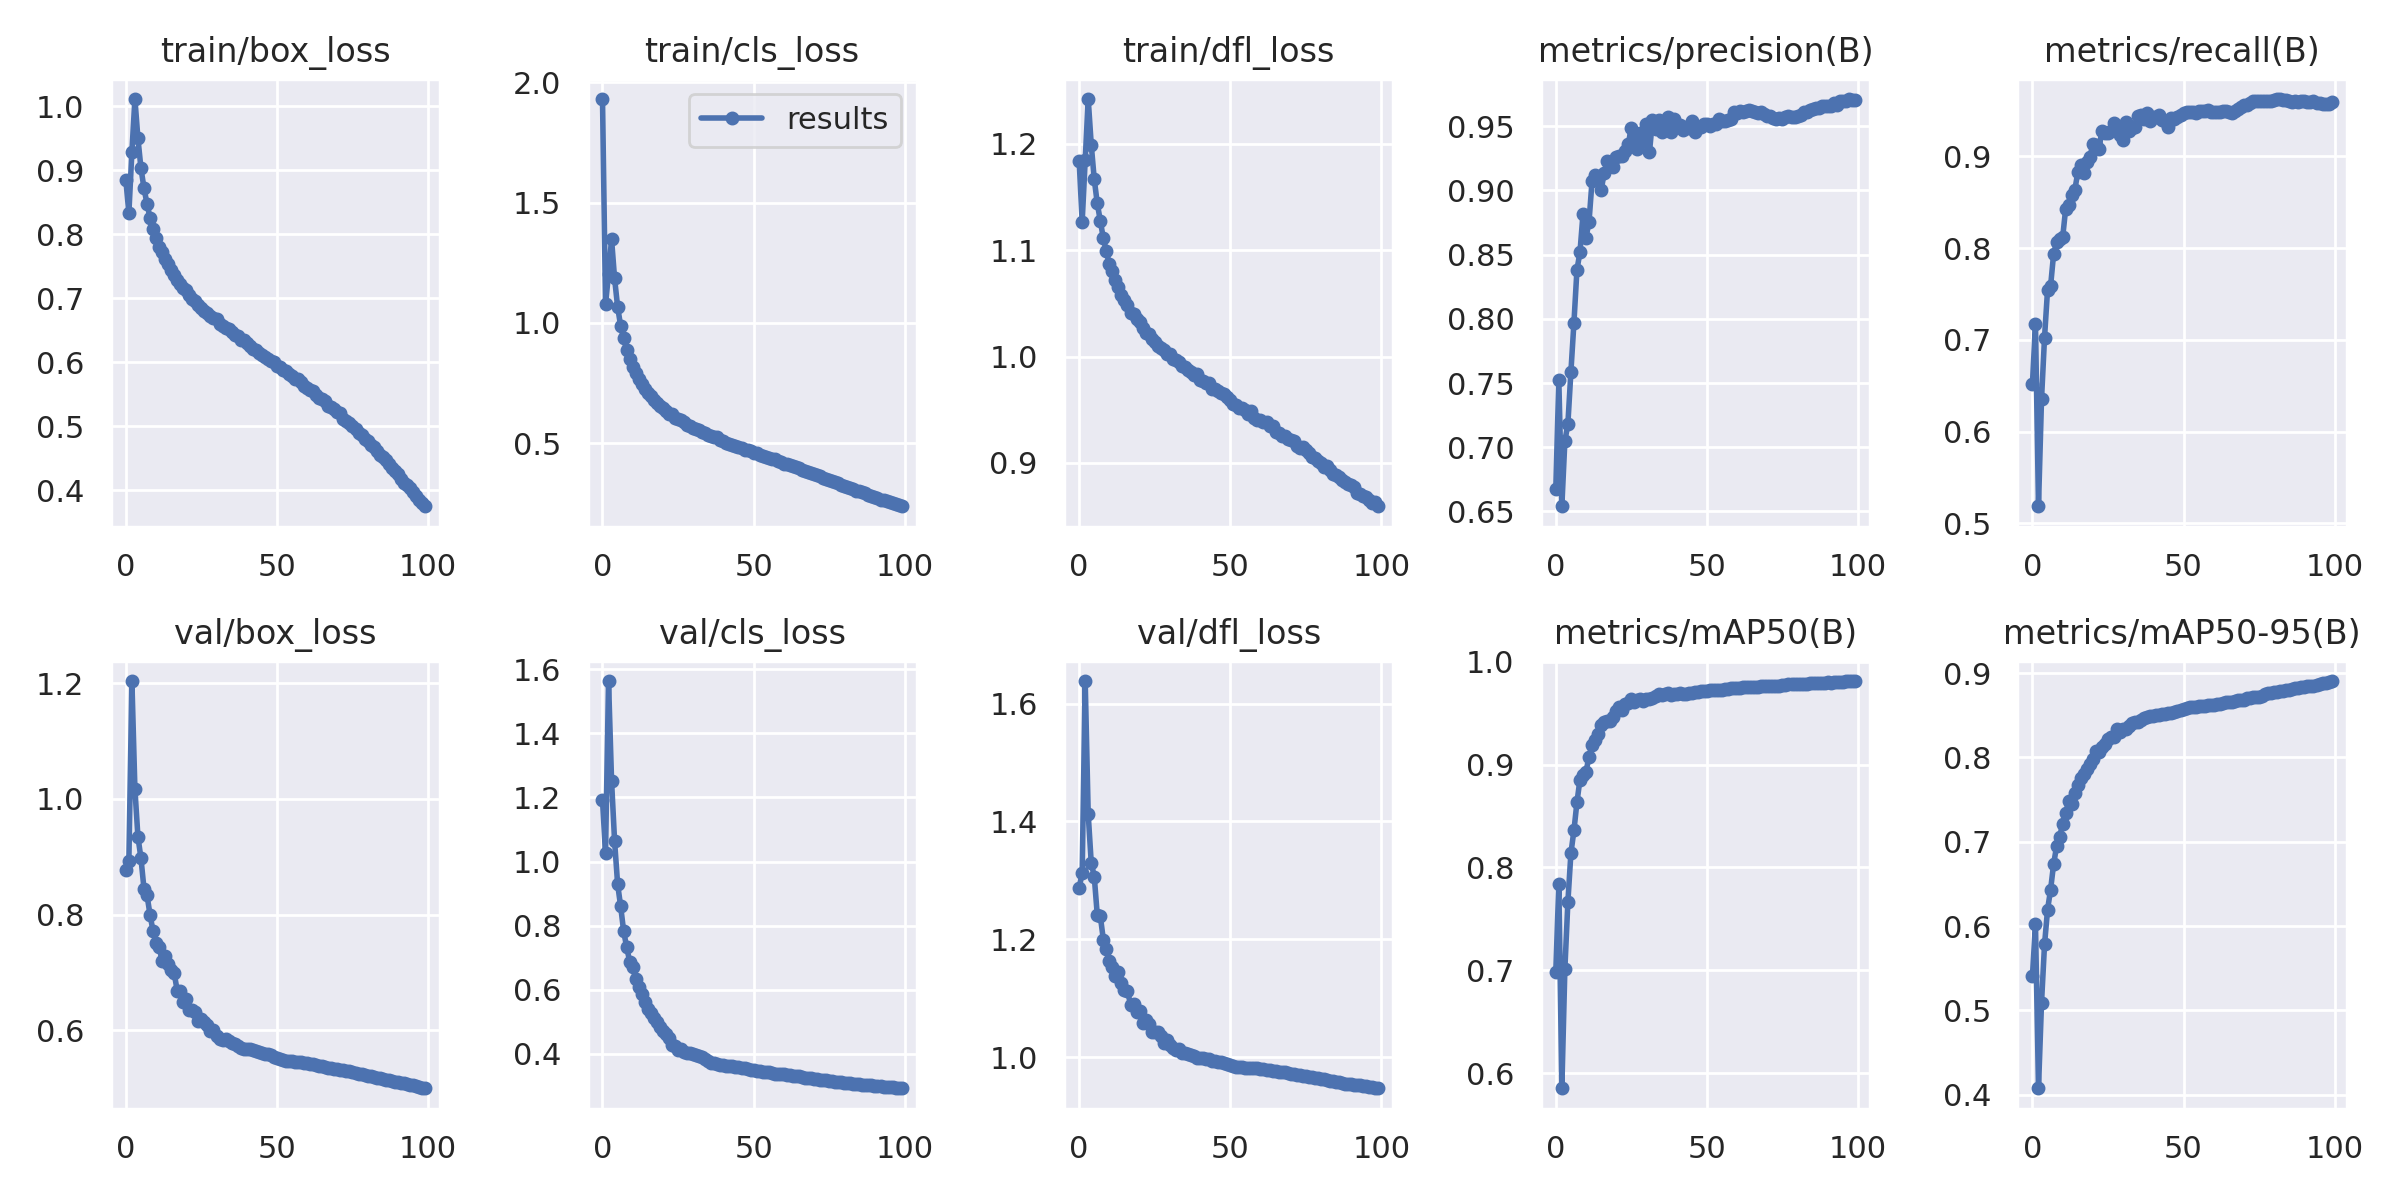

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


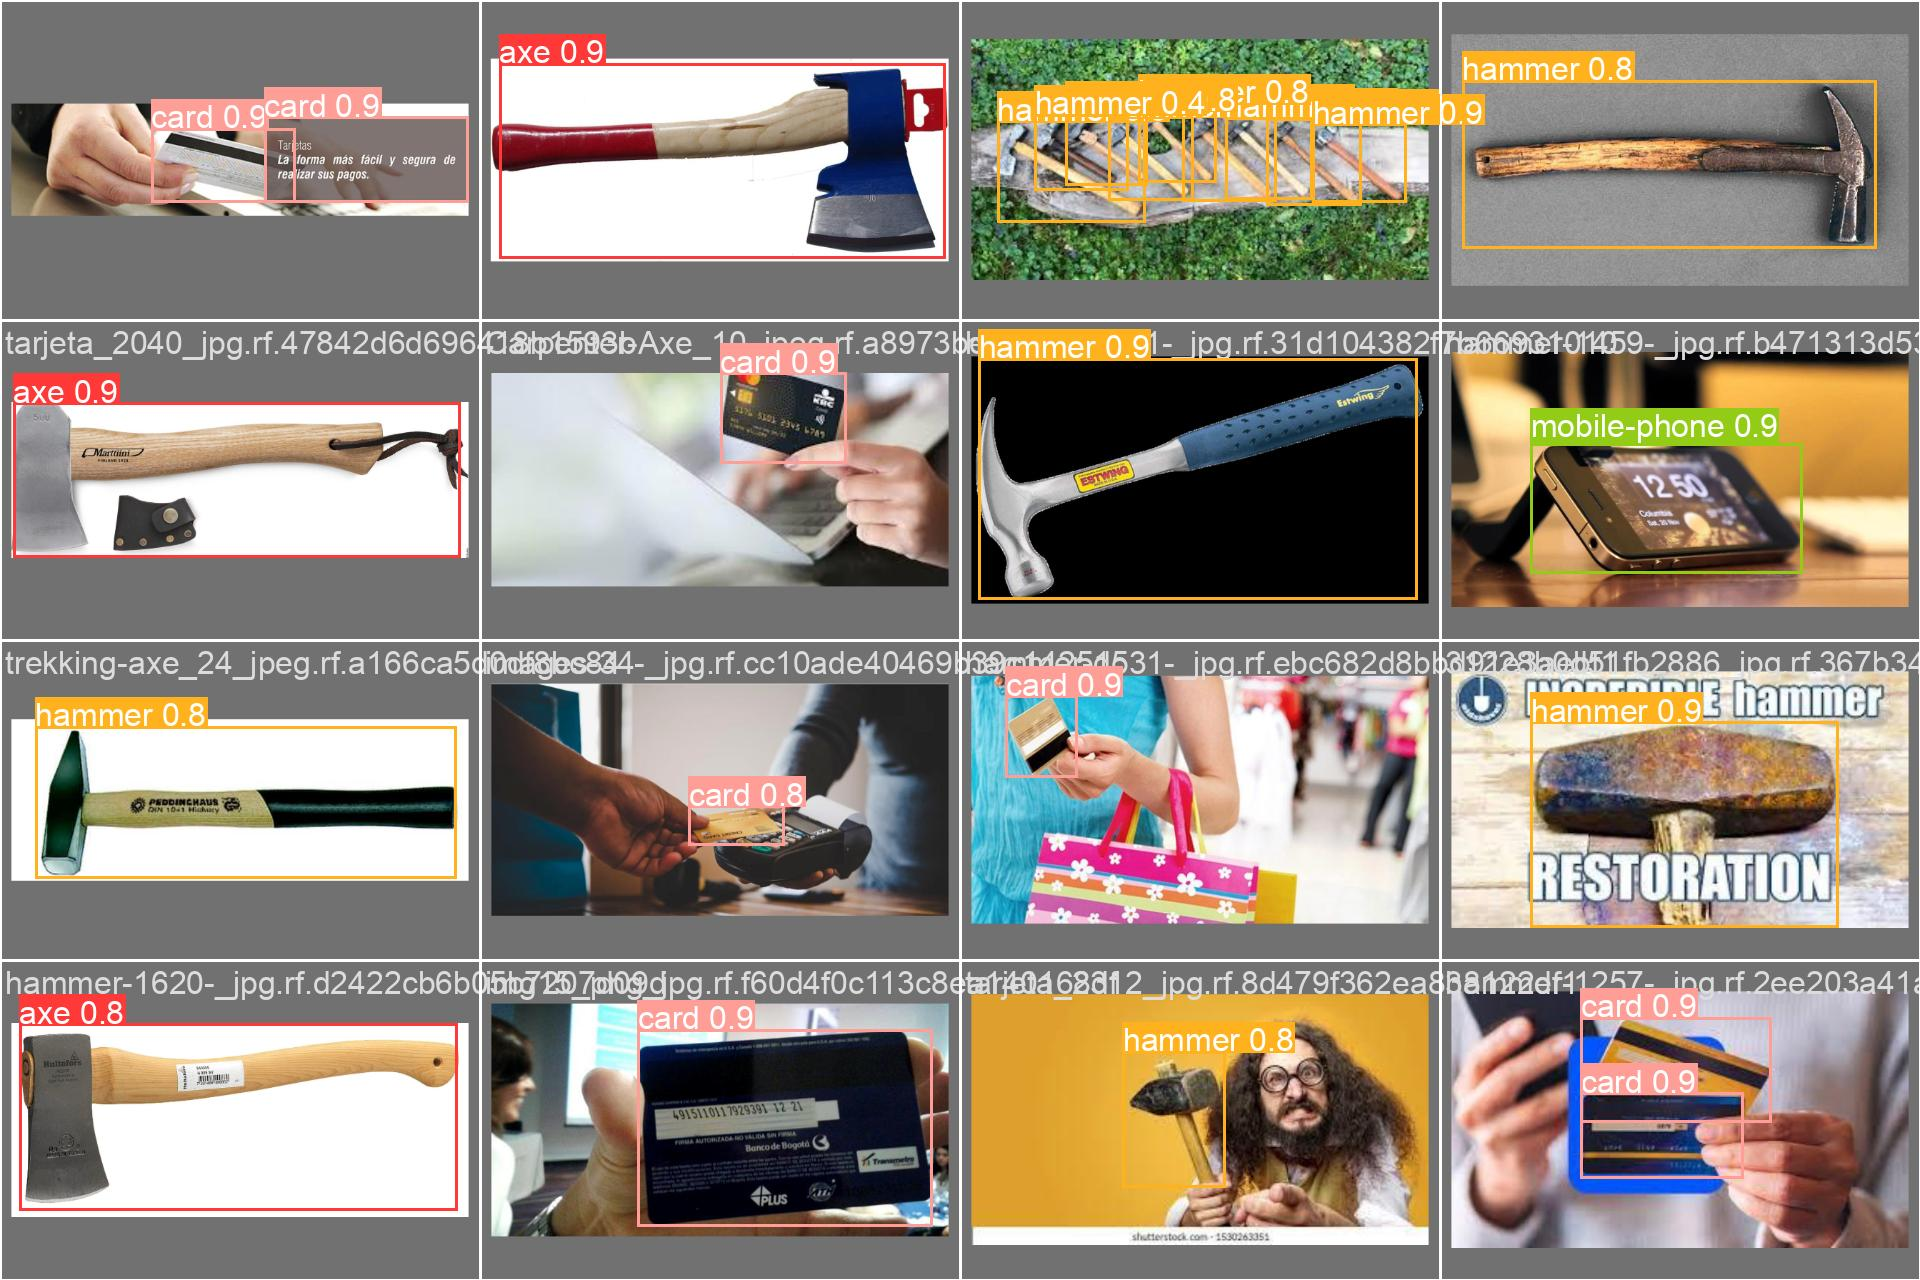

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

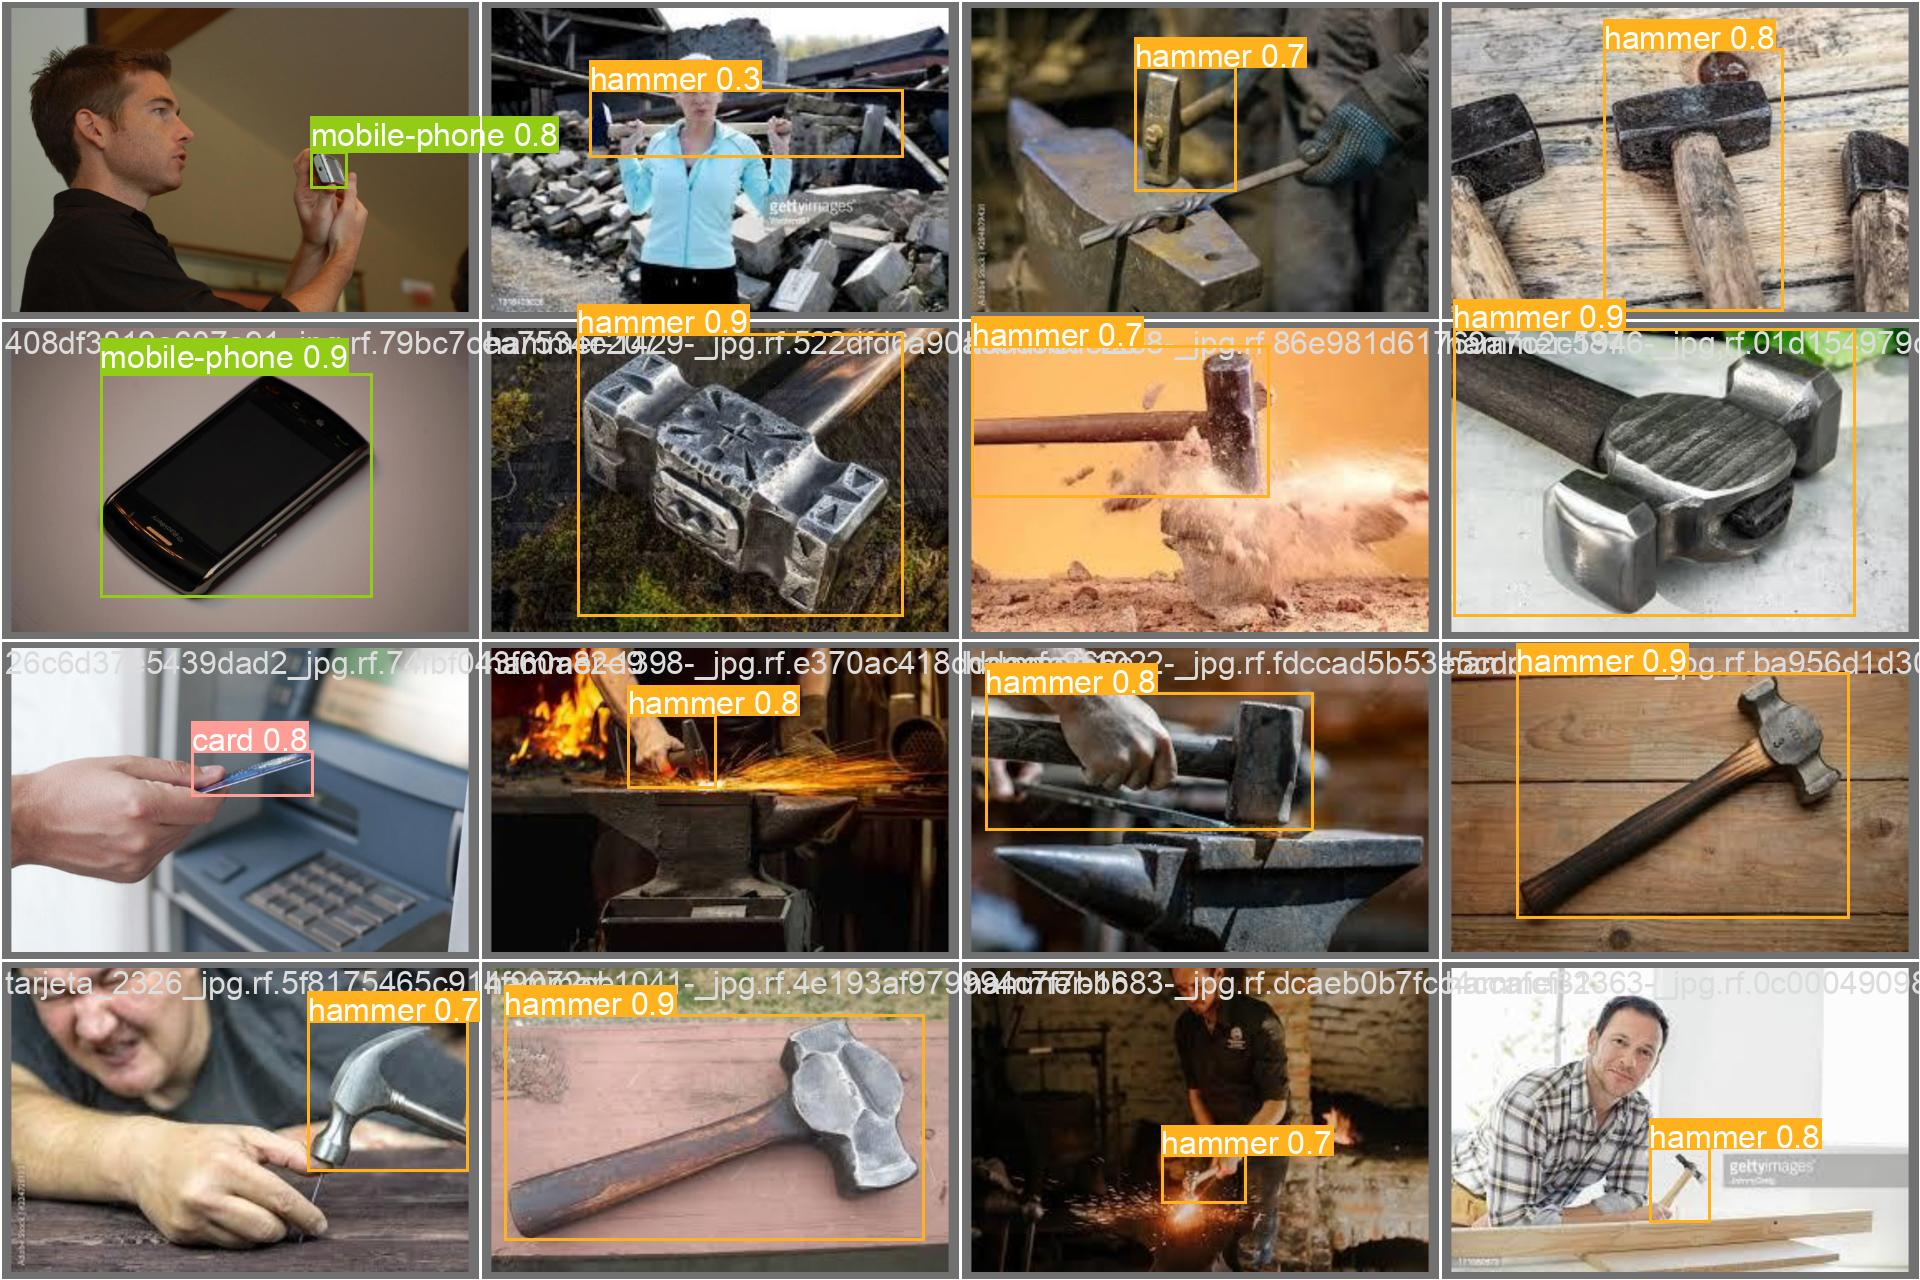

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

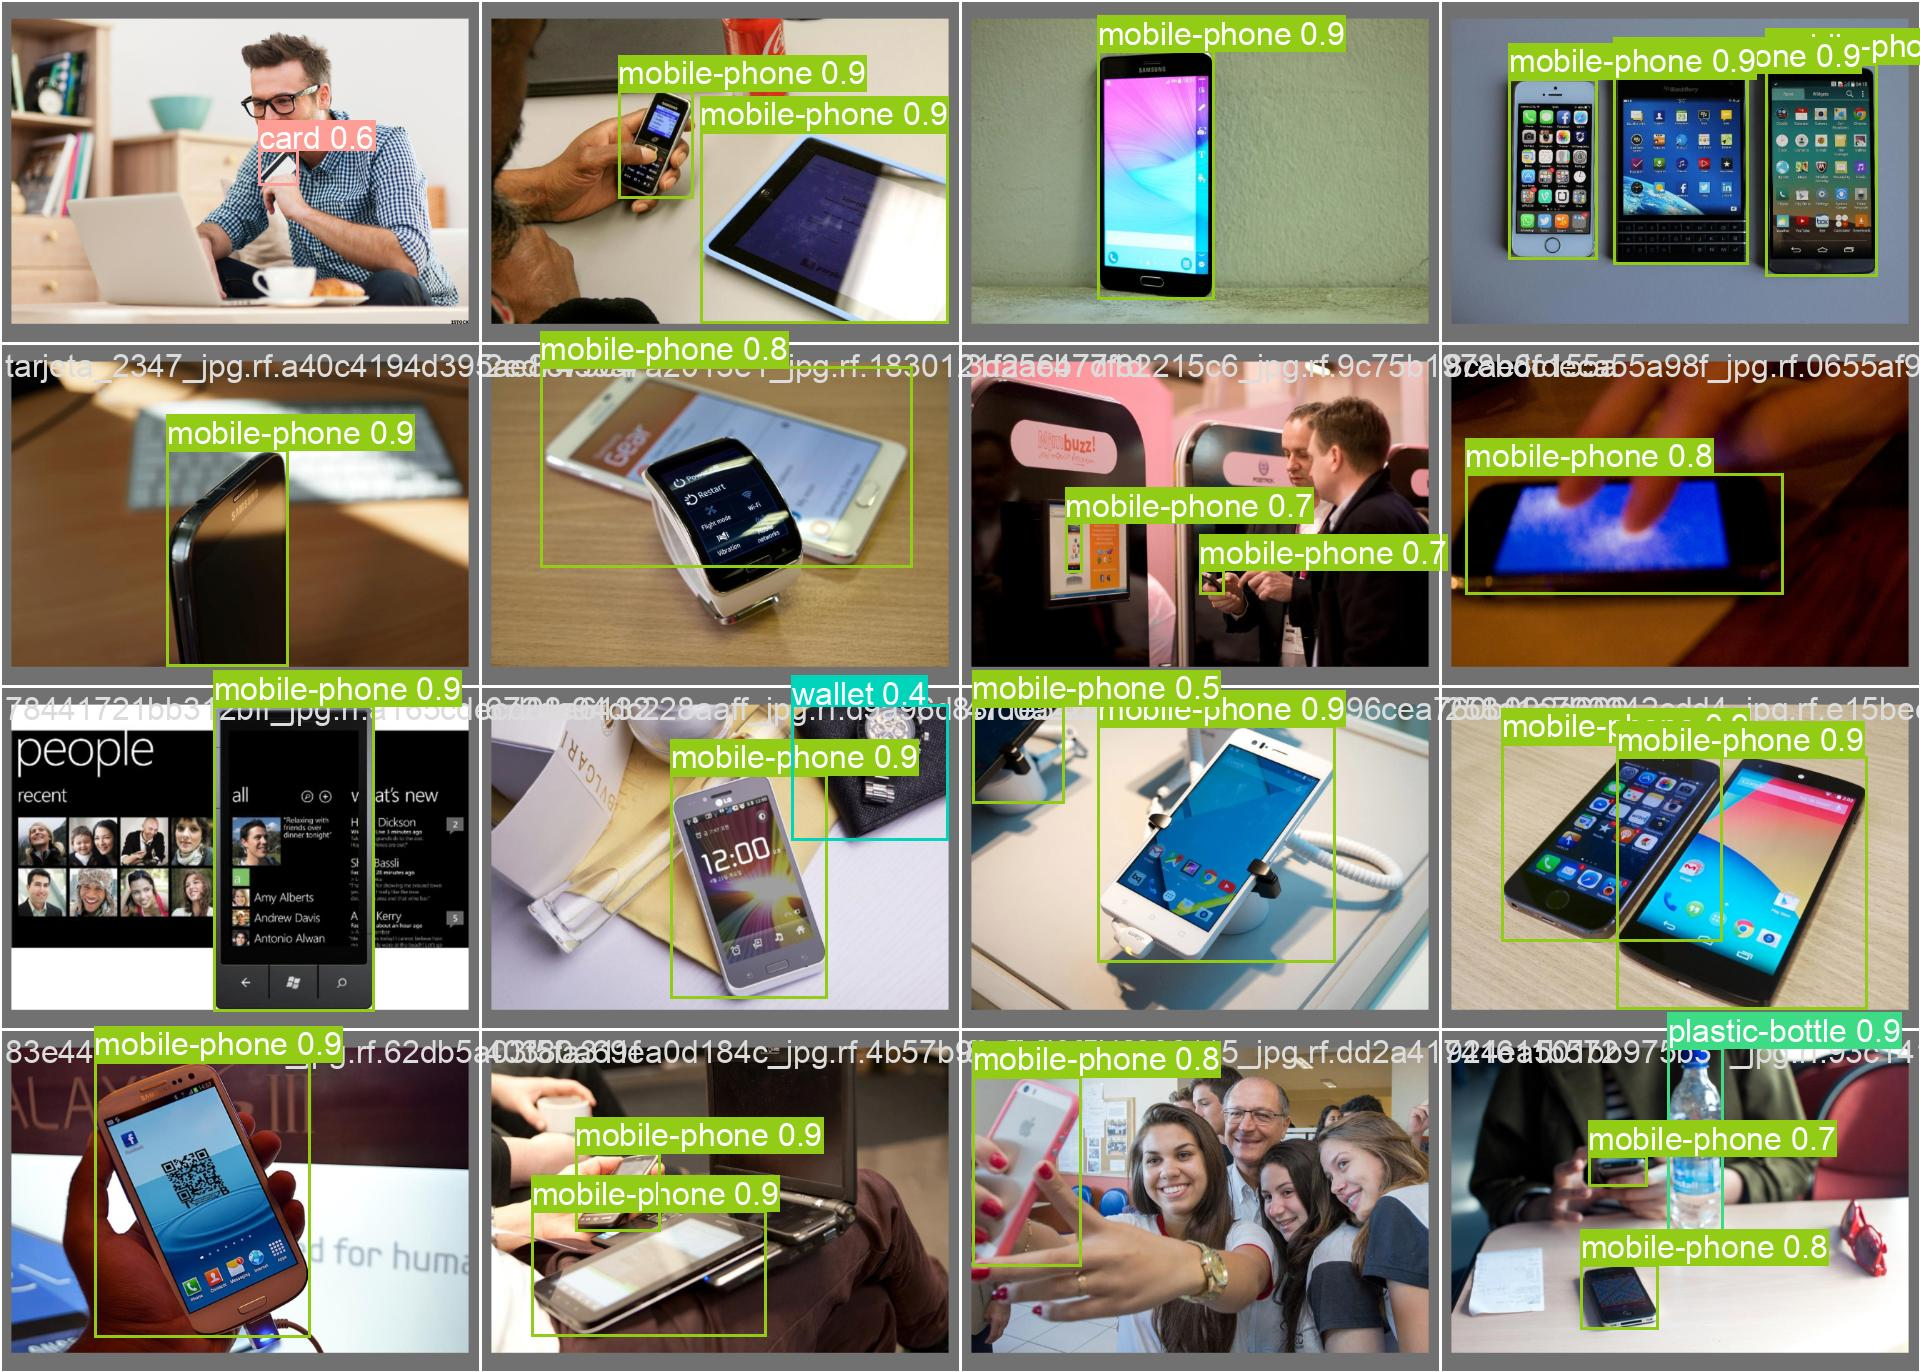

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-15 02:40:54.003862: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 02:40:55.681959: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/WeaponDetection-3/valid/labels.cache... 1180 images, 0 backgrounds, 0 corrupt: 100% 1180/1180 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 74/74 [00:27<00:00,  2.73it/s]
                   all       1180       1375       0.97      0.959      0.981       0.89
                   ax

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-10-15 02:41:36.293734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 02:41:37.225700: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
image 1/947 /content/datasets/WeaponDetection-3/test/images/-141_jpg.rf.5b2574184a139fa09cf76081a78ffe1f.jpg: 640x640 1 plastic-bottle, 16.0ms
image 2/947 /content/datasets/WeaponDetection-3/test/images/-179_jpg.rf.a9163d74241b2b5f8558ba984b48ea77.jpg: 640x640 2 plastic-bottles, 16.1ms
image 3/947 /content/datasets/WeaponDetection-3/test/images/-197_jpg.rf.be832a49257a8cd7e80d

## Deploy model on Roboflow

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="XngEegQzchABoc7ioD08")
project = rf.workspace("ai-h357g").project("weapondetection-ipjj1")
project.version(2).deploy(model_type="yolov8", model_path=f"/content/drive/MyDrive/Colab Notebooks/AI집중교육/yolo/v8/train/")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/ai-h357g/weapondetection-ipjj1/2
Share your model with the world at: https://universe.roboflow.com/ai-h357g/weapondetection-ipjj1/model/2
